In [6]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import pandas as pd

In [7]:
# read the data
data = pd.read_csv('../meta.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


In [8]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2673 entries, 0 to 2672
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2673 non-null   object 
 1   Open    2673 non-null   float64
 2   High    2673 non-null   float64
 3   Low     2673 non-null   float64
 4   Close   2673 non-null   float64
 5   Volume  2673 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 125.4+ KB


Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
# original code

# data.reset_index(drop=True, inplace=True)
# data.fillna(data.mean(), inplace=True)
# data.head()

In [10]:
# updated code as they are trying to calculate mean of non-numeric data (date col)

data.reset_index(drop=True, inplace=True)
# Only fill NA values in numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data.head()

,Date,Open,High,Low,Close,Volume
0,2012-05-18,42.05,45.00,38.00,38.2318,573576400
1,2012-05-21,36.53,36.66,33.00,34.0300,168192700
2,2012-05-22,32.61,33.59,30.94,31.0000,101786600
3,2012-05-23,31.37,32.50,31.36,32.0000,73600000
4,2012-05-24,32.95,33.21,31.77,33.0300,50237200


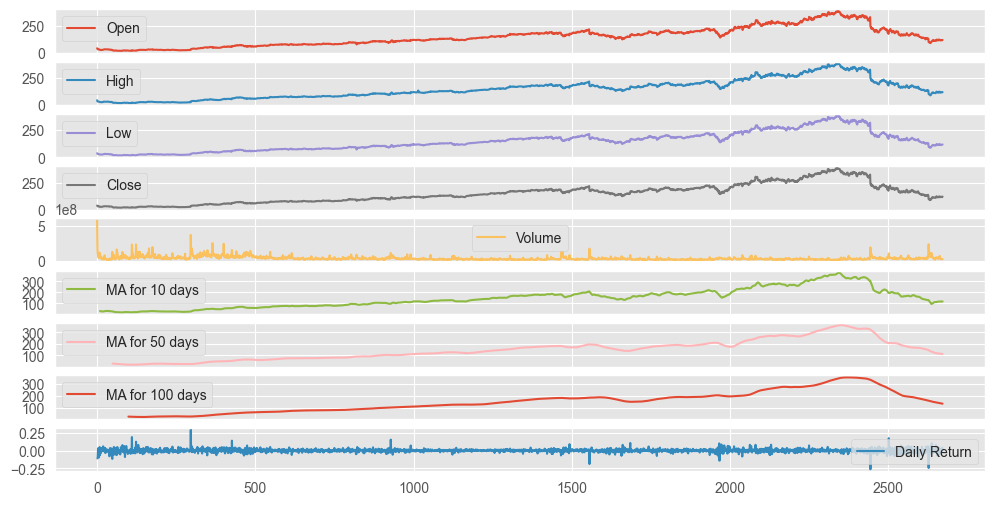

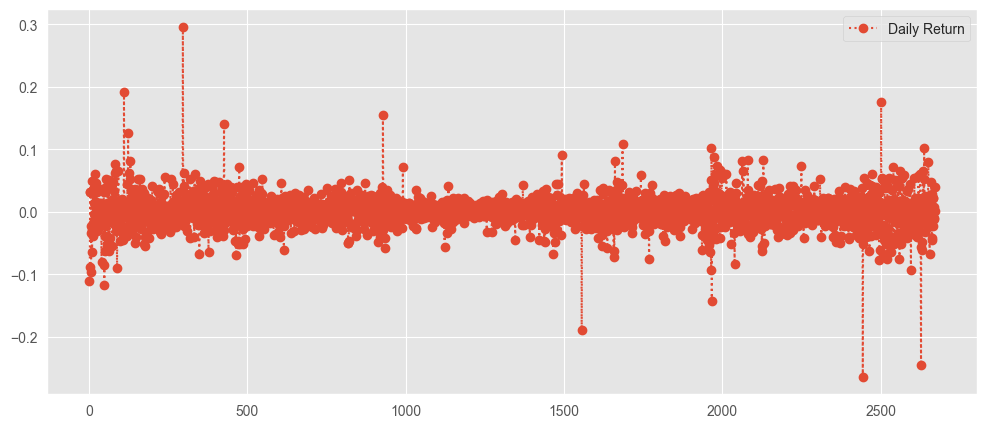

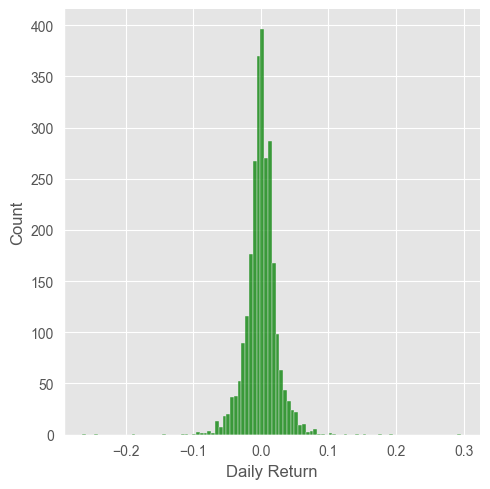

            Date    Open     High       Low     Close     Volume  \
0     2012-05-18   42.05   45.000   38.0000   38.2318  573576400   
1     2012-05-21   36.53   36.660   33.0000   34.0300  168192700   
2     2012-05-22   32.61   33.590   30.9400   31.0000  101786600   
3     2012-05-23   31.37   32.500   31.3600   32.0000   73600000   
4     2012-05-24   32.95   33.210   31.7700   33.0300   50237200   
...          ...     ...      ...       ...       ...        ...   
2668  2022-12-23  116.03  118.175  115.5350  118.0400   17796625   
2669  2022-12-27  117.93  118.600  116.0501  116.8800   21392311   
2670  2022-12-28  116.25  118.150  115.5100  115.6200   19612473   
2671  2022-12-29  116.40  121.030  115.7700  120.2600   22366192   
2672  2022-12-30  118.16  120.420  117.7400  120.3400   19583825   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0         148.235912      149.399662       150.826781      0.000751  
1         148.235912      149.399662       

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

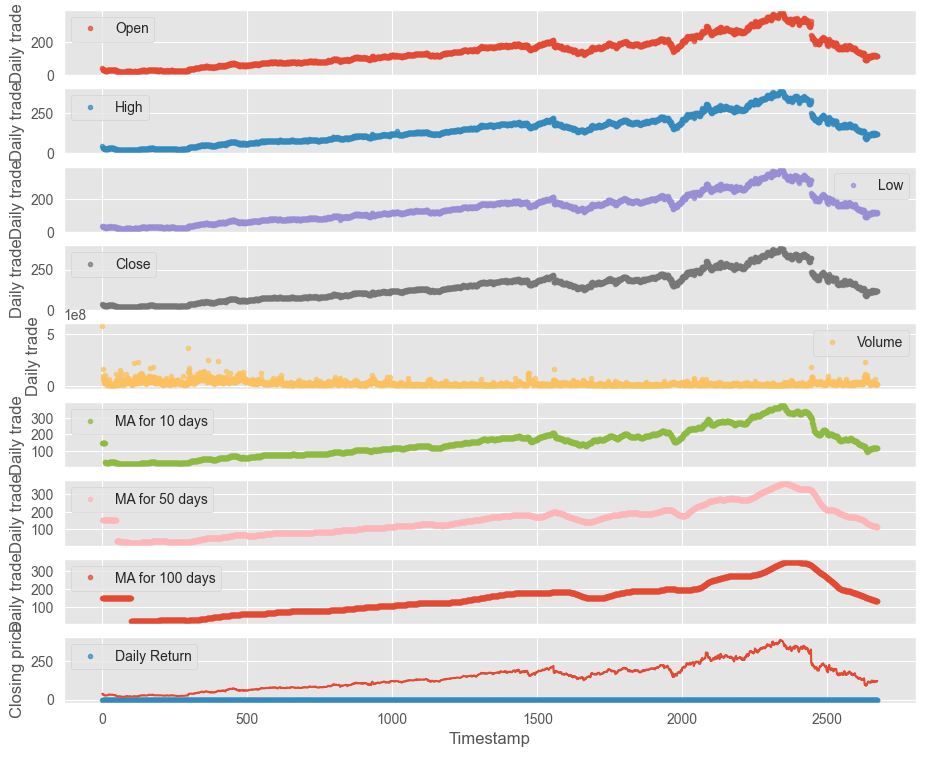

In [12]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
# Only fill NA values in numeric columns
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

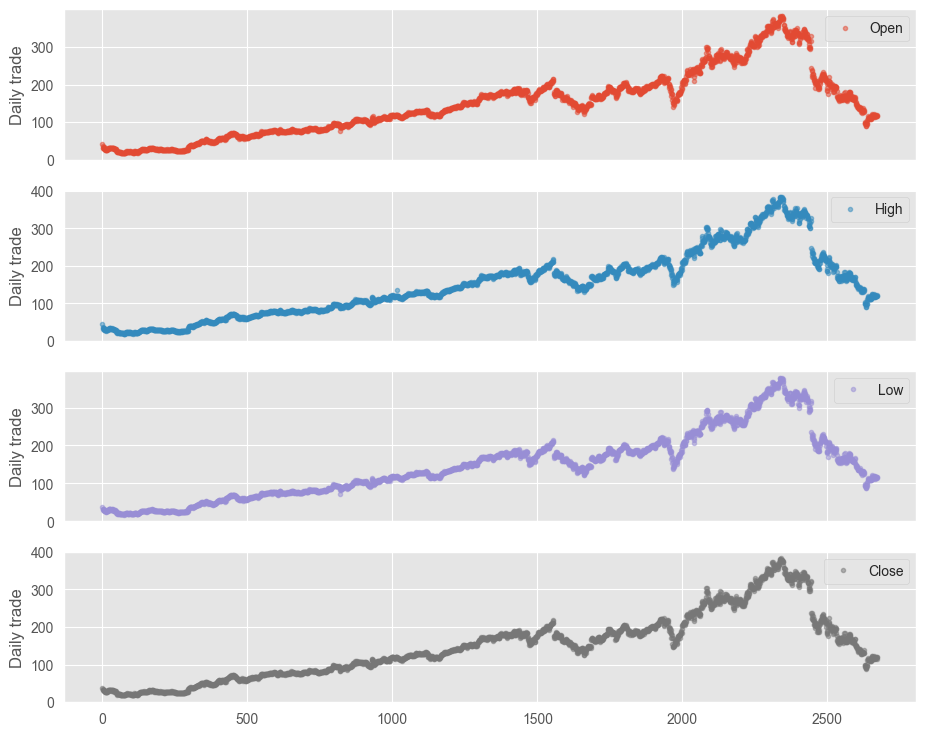

In [13]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

            Date    Open     High       Low     Close     Volume  \
0     2012-05-18   42.05   45.000   38.0000   38.2318  573576400   
1     2012-05-21   36.53   36.660   33.0000   34.0300  168192700   
2     2012-05-22   32.61   33.590   30.9400   31.0000  101786600   
3     2012-05-23   31.37   32.500   31.3600   32.0000   73600000   
4     2012-05-24   32.95   33.210   31.7700   33.0300   50237200   
...          ...     ...      ...       ...       ...        ...   
2668  2022-12-23  116.03  118.175  115.5350  118.0400   17796625   
2669  2022-12-27  117.93  118.600  116.0501  116.8800   21392311   
2670  2022-12-28  116.25  118.150  115.5100  115.6200   19612473   
2671  2022-12-29  116.40  121.030  115.7700  120.2600   22366192   
2672  2022-12-30  118.16  120.420  117.7400  120.3400   19583825   

      MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0         148.235912      149.399662       150.826781      0.000751  
1         148.235912      149.399662       

,count,mean,std,min,25%,50%,75%,max
Open,2673.0,1.479633e+02,8.696828e+01,1.808000e+01,7.780000e+01,1.422600e+02,1.913600e+02,3.816800e+02
High,2673.0,1.498468e+02,8.805465e+01,1.827000e+01,7.853000e+01,1.445600e+02,1.940300e+02,3.843300e+02
Low,2673.0,1.460862e+02,8.591529e+01,1.755000e+01,7.705000e+01,1.408700e+02,1.884700e+02,3.788100e+02
Close,2673.0,1.479917e+02,8.699929e+01,1.772900e+01,7.783000e+01,1.422800e+02,1.912900e+02,3.821800e+02
Volume,2673.0,3.115405e+07,2.721709e+07,5.913066e+06,1.618928e+07,2.313342e+07,3.599420e+07,5.735764e+08
MA for 10 days,2673.0,1.482359e+02,8.671628e+01,1.877955e+01,7.790150e+01,1.429620e+02,1.914290e+02,3.786580e+02
MA for 50 days,2673.0,1.493997e+02,8.551053e+01,2.017572e+01,7.840100e+01,1.493997e+02,1.899426e+02,3.637544e+02
MA for 100 days,2673.0,1.508268e+02,8.390099e+01,2.193012e+01,7.966445e+01,1.508268e+02,1.893073e+02,3.510299e+02
Daily Return,2673.0,7.506843e-04,2.526918e-02,-2.639009e-01,-1.010279e-02,8.658009e-04,1.264405e-02,2.960770e-01


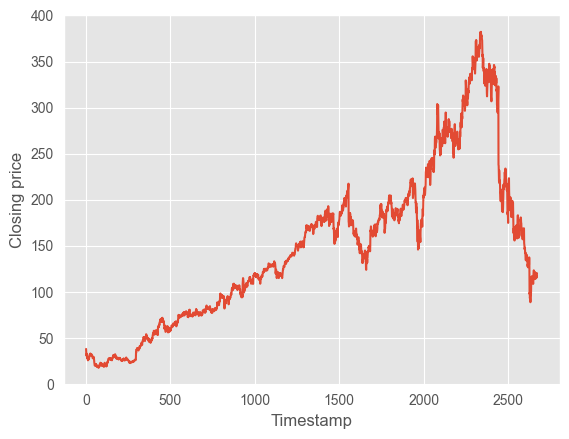

In [14]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [16]:
# preprocessing portion

import numpy as np
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2056
515


In [17]:
# training portion

# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40


c:\Users\timoz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 48ms/step - loss: 0.0292 - mae: 0.1221 - mse: 0.0292 - val_loss: 0.0128 - val_mae: 0.0838 - val_mse: 0.0128
Epoch 2/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0106 - mae: 0.0735 - mse: 0.0106 - val_loss: 0.0072 - val_mae: 0.0642 - val_mse: 0.0072
Epoch 3/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0080 - mae: 0.0633 - mse: 0.0080 - val_loss: 0.0060 - val_mae: 0.0559 - val_mse: 0.0060
Epoch 4/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0072 - mae: 0.0614 - mse: 0.0072 - val_loss: 0.0063 - val_mae: 0.0602 - val_mse: 0.0063
Epoch 5/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0068 - mae: 0.0601 - mse: 0.0068 - val_loss: 0.0049 - val_mae: 0.0522 - val_mse: 0.0049
Epoch 6/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0056 - mae: 0.0548 - mse: 0.0056 - val_loss: 0.0041 - val_mae: 0.0490 - val_mse: 0.0041
Epoch 7/40
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054 - mae: 0.0527 - mse: 0.0054 - val_loss: 0.0055 - v

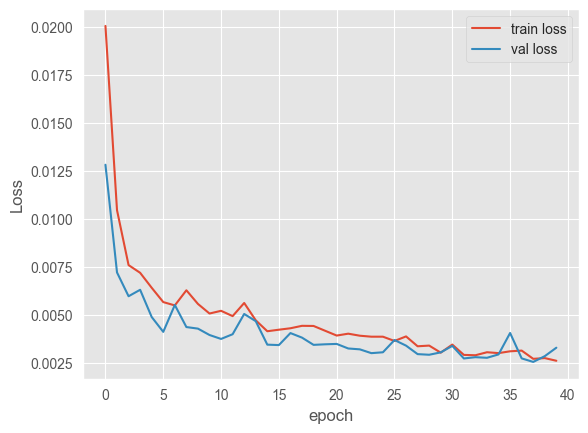

In [18]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

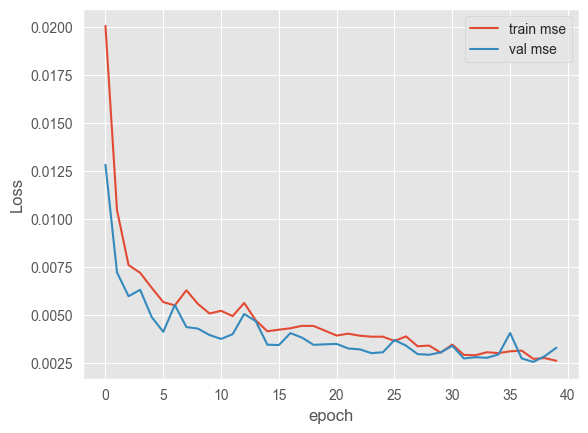

In [19]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

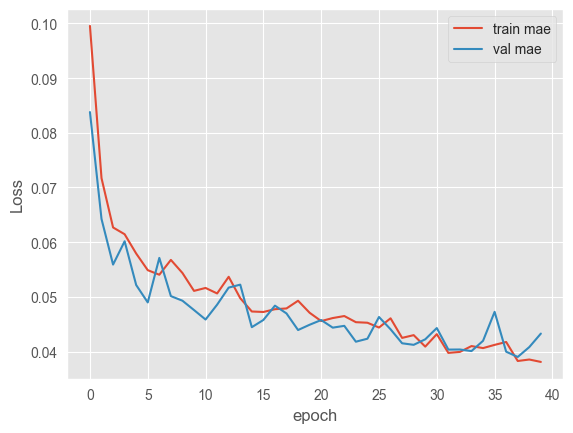

In [20]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [23]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
# plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ time_distributed                │ (None, 1, 98, 64)      │           256 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_1              │ (None, 1, 49, 64)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_2              │ (None, 1, 47, 128)     │        24,704 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 1, 23, 128)     │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_4              │ (None, 1, 21, 64)      │        24,640 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_5              │ (None, 1, 10, 64)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 1, 640)         │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 1, 200)         │       592,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 200)            │       240,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,650,205 (10.11 MB)

 Trainable params: 883,401 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,766,804 (6.74 MB)

None


In [24]:
model.evaluate(test_X, test_Y)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0032 - mae: 0.0432 - mse: 0.0032


[0.0032938793301582336, 0.0032938793301582336, 0.043281372636556625]

In [25]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.951720
R2 Score: 0.951720
Max Error: 0.253027


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


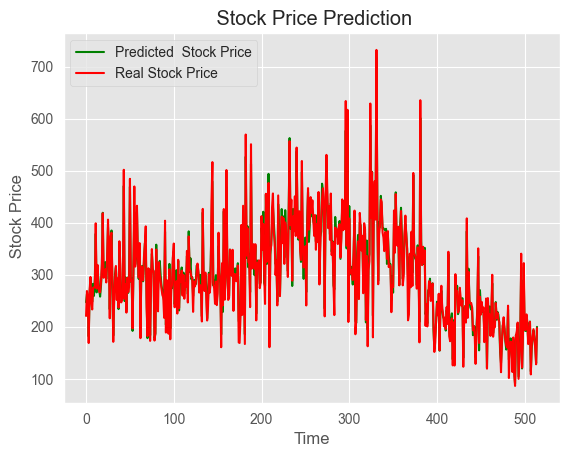

In [26]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

Testing portion

In [28]:
# save the model
# model.save('cnn_lstm_original_model.h5')

model.save('cnn_lstm_original_model.keras')
